In [4]:
import json
import matplotlib.pyplot as plt

In [5]:
def get_data_from_stats_json (filename):
    with open (filename, 'r') as file:
        data = json.load(file)

    container_output = data.get("containerOutput")
    tcp_percentage = data.get("tcpPercentage")
    cpu_nano = [out.get("Stats")[0].get("CPUNano") for out in container_output]
    cpu_system_nano = [out.get("Stats")[0].get("CPUSystemNano") for out in container_output]
    cpu_nano_diffs = [cpu_nano[i] - cpu_nano[i-1] for i in range(1, len(cpu_nano))]
    cpu_system_nano_diffs = [cpu_system_nano[i] - cpu_system_nano[i-1] for i in range(1, len(cpu_system_nano))]
    initial_time = 0
    timing = [initial_time + i * 10 for i in range(len(cpu_nano_diffs))]
    sending_time = data.get("querySendingTime")
    number_queries = data.get("numberOfQueries" )
    network = data.get("network")

    return {
        "container_output" : container_output, 
        "tcp_percentage" : tcp_percentage, 
        "sending_time" : sending_time, 
        "number_queries" : number_queries, 
        "network" : network, 
        "cpu_nano_diffs" : cpu_nano_diffs, 
        "cpu_system_nano_diffs": cpu_system_nano_diffs, 
        "timing" : timing
    }



In [6]:
def make_a_plot(lines, x_axis_label, y_axis_label, title):
    for (x_data, y_data, data_label) in lines:
        plt.plot(x_data, y_data, label=data_label)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.legend(loc='lower left')
    plt.show()

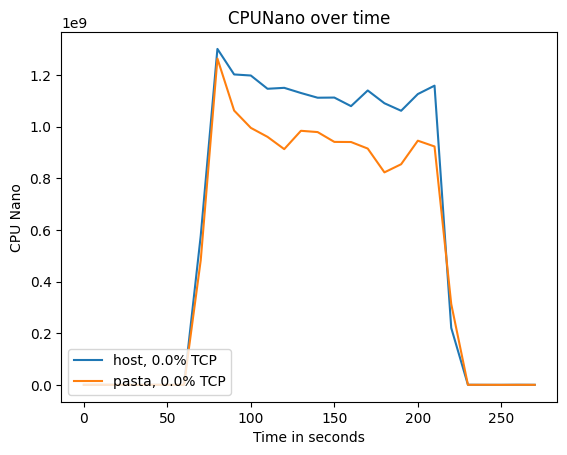

In [8]:
pasta_udp = get_data_from_stats_json('stats-output/0_tcp_pasta_22-10-2025_15:33:28.json')
host_udp = get_data_from_stats_json('stats-output/0_tcp_host_22-10-2025_15:33:28.json')
make_a_plot([(host_udp["timing"], host_udp["cpu_nano_diffs"], f"host, {host_udp["tcp_percentage"]}% TCP"), (pasta_udp["timing"], pasta_udp["cpu_nano_diffs"], f"pasta, {pasta_udp["tcp_percentage"]}% TCP")], "Time in seconds", "CPU Nano", "CPUNano over time")

Testing whether using the host network impacts the measurements:


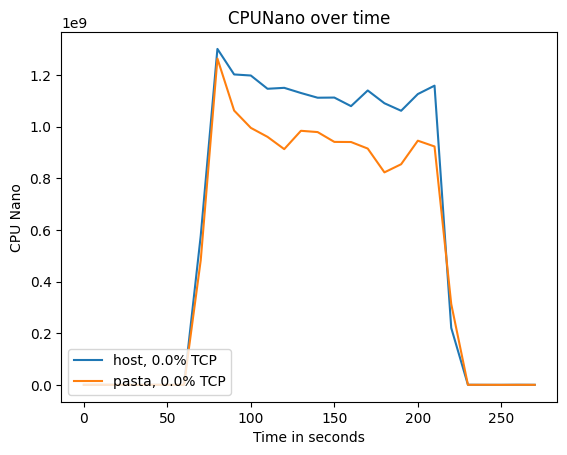

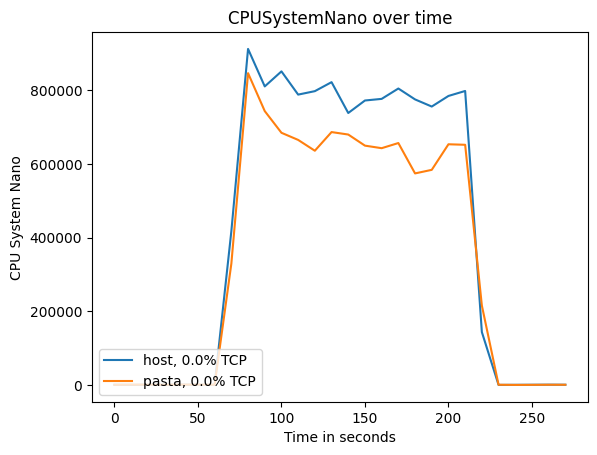

In [ ]:
print("Testing whether using the host network impacts the measurements:")



plt.plot(host_udp["timing"], host_udp["cpu_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU Nano")
plt.title("CPUNano over time")
plt.legend(loc='lower left')
plt.show()

plt.plot(host_udp["timing"], host_udp["cpu_system_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_system_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU System Nano")
plt.title("CPUSystemNano over time")
plt.legend(loc='lower left')
plt.show()

Comparing the CPU usage for TCP vs UDP, with pasta and host network


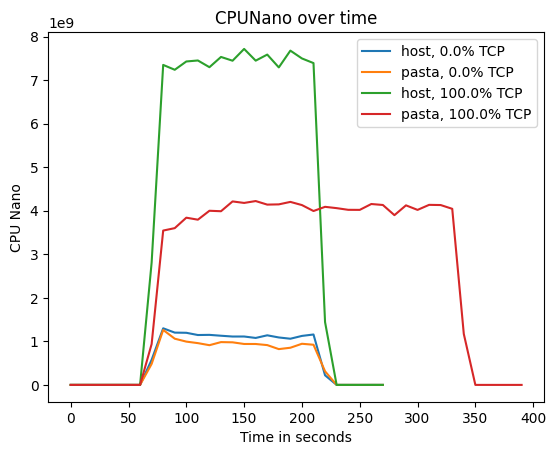

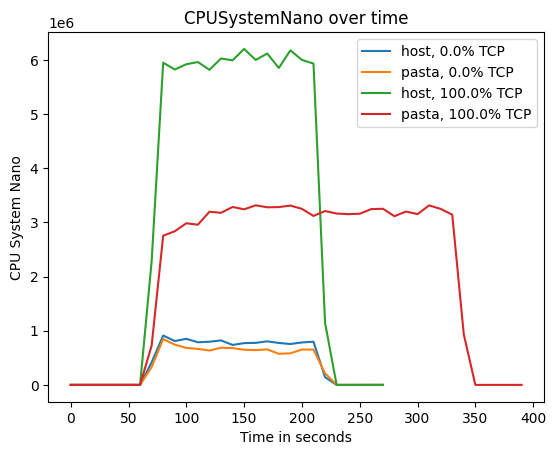

In [9]:
print("Comparing the CPU usage for TCP vs UDP, with pasta and host network")

pasta_udp = get_data_from_stats_json('stats-output/0_tcp_pasta_22-10-2025_15:33:28.json')
host_udp = get_data_from_stats_json('stats-output/0_tcp_host_22-10-2025_15:33:28.json')
pasta_tcp = get_data_from_stats_json('stats-output/100_tcp_pasta_22-10-2025_15:33:28.json')
host_tcp = get_data_from_stats_json('stats-output/100_tcp_host_22-10-2025_15:33:28.json')

plt.plot(host_udp["timing"], host_udp["cpu_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.plot(host_tcp["timing"], host_tcp["cpu_nano_diffs"], label=f"host, {host_tcp["tcp_percentage"]}% TCP")
plt.plot(pasta_tcp["timing"], pasta_tcp["cpu_nano_diffs"], label=f"pasta, {pasta_tcp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU Nano")
plt.title("CPUNano over time")
plt.legend(loc='upper right')
plt.show()

plt.plot(host_udp["timing"], host_udp["cpu_system_nano_diffs"], label=f"host, {host_udp["tcp_percentage"]}% TCP")
plt.plot(pasta_udp["timing"], pasta_udp["cpu_system_nano_diffs"], label=f"pasta, {pasta_udp["tcp_percentage"]}% TCP")
plt.plot(host_tcp["timing"], host_tcp["cpu_system_nano_diffs"], label=f"host, {host_tcp["tcp_percentage"]}% TCP")
plt.plot(pasta_tcp["timing"], pasta_tcp["cpu_system_nano_diffs"], label=f"pasta, {pasta_tcp["tcp_percentage"]}% TCP")
plt.xlabel("Time in seconds")
plt.ylabel("CPU System Nano")
plt.title("CPUSystemNano over time")
plt.legend(loc='upper right')
plt.show()